## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import DataGenerator, KneeLocator

## Import data

In [28]:
dfs = pd.read_csv(".//DB-SCAN_files/points_from _2017-1-1_to_2019-12-31_weekdays_1_weekends_0_labeled_0.97_19.csv")
dbscan_sizes = {}
for c in dfs['label']:
    if c not in dbscan_sizes.keys():
        dbscan_sizes[c] = 0
    dbscan_sizes[c] += 1
for key in sorted(dbscan_sizes):
    print(f"{key}: {dbscan_sizes[key]}")
    
main_cluster = max(dbscan_sizes, key=dbscan_sizes.get)
print("Main cluster is: ", main_cluster)

-1: 100
0: 19843
1: 29
2: 829
3: 23
4: 410
Main cluster is:  0


In [16]:
lat=[dfs["lat"][it] for it in range(len(dfs["lat"])) if dfs["label"][it]==main_cluster]
lng=[dfs["lng"][it] for it in range(len(dfs["lng"])) if dfs["label"][it]==main_cluster]
lat_out=[dfs["lat"][it] for it in range(len(dfs["lat"])) if dfs["label"][it]!=main_cluster]
lng_out=[dfs["lng"][it] for it in range(len(dfs["lng"])) if dfs["label"][it]!=main_cluster]

## Plot the results (DB-SCAN already runned)

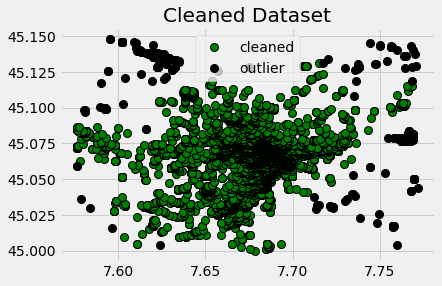

In [17]:
plt.title('Cleaned Dataset')
plt.plot(lng,lat, 'o', markerfacecolor="green", markeredgecolor='k', markersize=8,label="cleaned")
plt.plot(lng_out,lat_out, 'o', markerfacecolor="black", markeredgecolor='k', markersize=8,label="outlier")
plt.legend()

## Create the joined vector for K-Means

In [18]:
X = np.array(list(zip(lat, lng))).reshape(len(lat), 2)

## Prepare structures to save results

In [19]:
distortions = []
silhouette_coefficients=[]

## Number of cluster to cycle for the tuning phase

In [20]:
K = range(2,30)

## Run the K-Means algorithm with multiple configurations

In [21]:
for k in K:
    print(f"k:{k};",end=" ")
    kmeanModel = KMeans(n_clusters=k).fit(X)
    label=kmeanModel.fit_predict(X)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(X, kmeanModel.labels_)
    silhouette_coefficients.append(score)

k:2; k:3; k:4; k:5; k:6; k:7; k:8; k:9; k:10; k:11; k:12; k:13; k:14; k:15; k:16; k:17; k:18; k:19; k:20; k:21; k:22; k:23; k:24; k:25; k:26; k:27; k:28; k:29; 

## Apply the elbow-method to tune results

Text(0.5, 0, 'k')

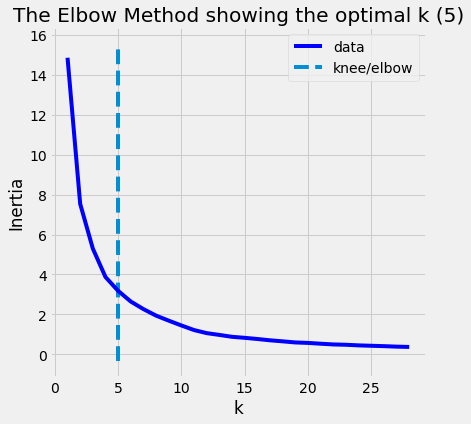

In [22]:
kneedle = KneeLocator(range(1,len(distortions)+1), distortions, S=1.0, curve="convex", direction="decreasing")#,interp_method='polynomial')
knee = round(kneedle.knee)
kneedle.plot_knee()
plt.title(f"The Elbow Method showing the optimal k ({knee})")
plt.ylabel("Inertia")
plt.xlabel("k")

## Apply the silhouette-method to tune results

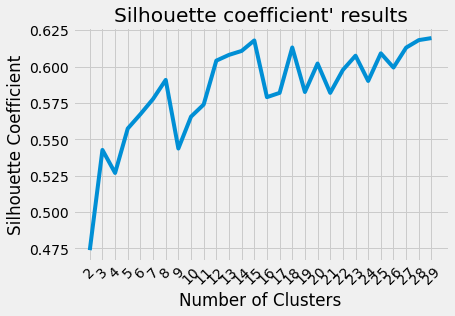

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(K, silhouette_coefficients)
plt.title("Silhouette coefficient' results")
plt.xticks(K)
plt.xlabel("Number of Clusters")
plt.xticks(rotation=45)
plt.ylabel("Silhouette Coefficient")
max_silh = K[np.asarray(silhouette_coefficients).argmax()]

## Representation with elbow's parameter

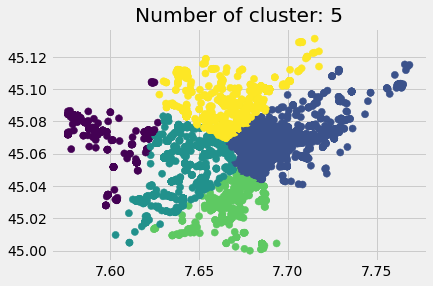

In [24]:
kmeanModel = KMeans(n_clusters=knee).fit(X)
label=kmeanModel.fit_predict(X)
plt.title(f'Number of cluster: {knee}')
plt.scatter(X[:, 1], X[:, 0], c=label, s=50, cmap='viridis')

## Representation with silhouette's parameter

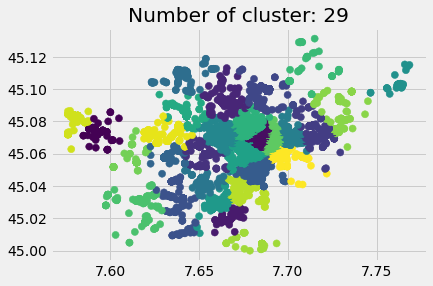

In [25]:
kmeanModel = KMeans(n_clusters=max_silh).fit(X)
label=kmeanModel.fit_predict(X)
plt.title(f'Number of cluster: {max_silh}')
plt.scatter(X[:, 1], X[:, 0], c=label, s=50, cmap='viridis')

In [13]:
clusters_size = {}
for c in label:
    if c not in clusters_size.keys():
        clusters_size[c] = 0
    clusters_size[c] += 1
for key in sorted(clusters_size):
    print(f"{key}: {clusters_size[key]}")

0: 1077
1: 938
2: 502
3: 427
4: 131
